
## Business Problem: Predicting Personality Types for Enhanced User Engagement
### Background
In today’s highly personalized digital landscape, businesses and platforms strive to deliver tailored experiences to their users. Understanding a user’s personality can enable companies to improve recommendations, content delivery, and overall engagement. However, traditional personality assessment methods, like the Myers-Briggs Type Indicator (MBTI), require users to answer lengthy questionnaires, which can be time-consuming and inconvenient.

### Problem Statement
The goal is to develop a machine learning model that predicts a person’s MBTI personality type based solely on their written text. This eliminates the need for lengthy questionnaires, providing a seamless, data-driven way to infer personality traits.

### Use Case Scenarios

* Content Recommendation Systems
Platforms like Netflix, YouTube, or Spotify can use personality predictions to recommend content aligned with users' preferences and cognitive styles.
* Targeted Marketing
Businesses can create personalized marketing campaigns that resonate with users’ personality traits, increasing engagement and conversions.
* HR and Recruitment
Companies can use text-based personality analysis to screen candidates, ensuring better cultural fit and team dynamics.
* Mental Health and Well-being Apps
Predicting personality types can help tailor advice, resources, and interactions to support users’ mental health more effectively.

## Objective
Build a machine learning model that predicts the MBTI personality type from text data, enabling businesses to integrate personality-based insights into their operations.

### Key Questions

1. Can personality types be inferred reliably from users' written text?

2. Which language features (e.g., sentiment, word choice, syntax) are most indicative of specific MBTI dimensions (e.g., introversion vs. extroversion)?
3. How accurately can the model predict MBTI types, and what level of confidence is sufficient for real-world applications?

#### Evaluation Metrics

Accuracy: Overall performance of the model in predicting the correct MBTI type.

Precision and Recall: Performance for individual personality dimensions.

F1-Score: A balance between precision and recall.

Confusion Matrix: Insights into misclassifications between similar MBTI types.

In [11]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load data
mbti_data = pd.read_csv('Data/reduced_mbti_dataset.csv', )
print(mbti_data.head(5))

#load the balanced dataset
balanced_data = pd.read_csv('Data/balanced_mbti_dataset.csv')
print(balanced_data.head(5))

   type                                              posts
0  INTJ  'There are two Entrepreneurial related shows o...
1  ISFP  'Dear Associates, thanks for bashing my ISFP-n...
2  ISFJ  'LOL! Funny. Your ego is hilariously huge. Aga...
3  ENTP  'Johnnywise, that's what I'm calling you.  Don...
4  INFP  'Too true:  The old world will burn in the fir...
                                               posts  type
0  'As an ENFJ, how ambitious are you? I am fairl...  ENFJ
1  I was fine academically. Hated things where I ...  ENFJ
2  'I chose populists, liberalists and pacifists ...  ENFJ
3  'https://www.youtube.com/watch?v=I6PYn-0XrgQ||...  ENFJ
4  'I am always falling for the introverts...|||O...  ENFJ


In [12]:
#check for missing values
print(mbti_data.isnull().sum())
print(balanced_data.isnull().sum())



type     0
posts    0
dtype: int64
posts    0
type     0
dtype: int64


the are no missing values in this dataset

### Exploratory Data Analysis


<ipython-input-3-ad9ab2642289>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=mbti_data, order=mbti_data['type'].value_counts().index, palette='viridis')


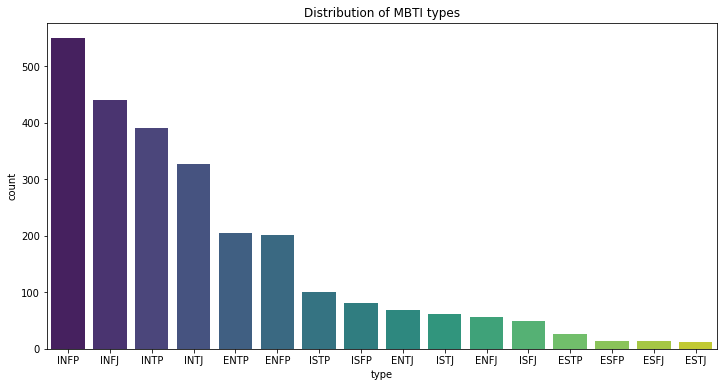

In [ ]:
#Analyze the distribution of MBTI types
plt.figure(figsize=(12,6))
sns.countplot(x='type', data=mbti_data, order=mbti_data['type'].value_counts().index, palette='viridis')
plt.title('Distribution of MBTI types')
plt.show()  #The distribution of MBTI types is not balanced. The dataset is biased towards INFP and INFJ types.

The type feature is the target feature that will be one hot encoded for modelling purposes. So the bar graph above indicates that there is a class imbalance in the target feature. I will use techniques such as SMOTE or class weights to address this later before training. 

<ipython-input-13-a0b86fc179d2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=balanced_data, order=mbti_data['type'].value_counts().index, palette='viridis')


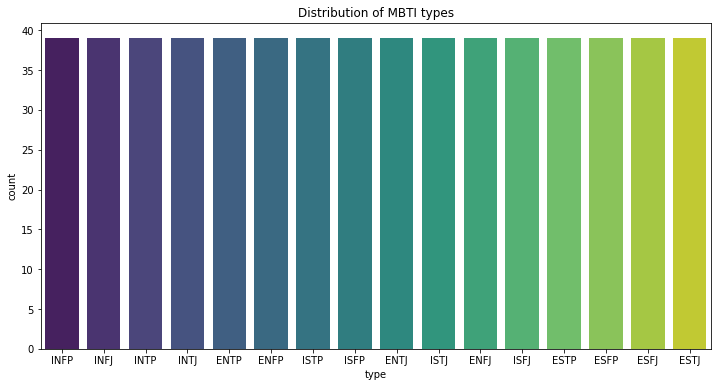

In [13]:
#Analyze the distribution of MBTI types
plt.figure(figsize=(12,6))
sns.countplot(x='type', data=balanced_data, order=mbti_data['type'].value_counts().index, palette='viridis')
plt.title('Distribution of MBTI types')
plt.show()  #The distribution of MBTI types is not balanced. The dataset is biased towards INFP and INFJ types.

In [14]:
#Inspect the text data for length, format, and content quality
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('|||', ' '))
balanced_data['posts'] = balanced_data['posts'].apply(lambda x: x.replace('|||', ' '))

mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('||', ' '))
balanced_data['posts'] = balanced_data['posts'].apply(lambda x: x.replace('||', ' '))

mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('http://', ' '))
balanced_data['posts'] = balanced_data['posts'].apply(lambda x: x.replace('http://', ' '))
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('https://', ' '))

mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('www.', ' '))
balanced_data['posts'] = balanced_data['posts'].apply(lambda x: x.replace('www.', ' '))

mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('com', ' '))
balanced_data['posts'] = balanced_data['posts'].apply(lambda x: x.replace('com', ' '))

mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('org', ' '))
balanced_data['posts'] = balanced_data['posts'].apply(lambda x: x.replace('org', ' '))


mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('net', ' '))
balanced_data['posts'] = balanced_data['posts'].apply(lambda x: x.replace('net', ' '))

mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('html', ' '))
balanced_data['posts'] = balanced_data['posts'].apply(lambda x: x.replace('html', ' '))

mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('pdf', ' '))
balanced_data['posts'] = balanced_data['posts'].apply(lambda x: x.replace('pdf', ' '))

mbti_data['post_length'] = mbti_data['posts'].apply(lambda x: len(x.split()))
balanced_data['post_length'] = balanced_data['posts'].apply(lambda x: len(x.split()))

print(mbti_data['post_length'].describe())
print(balanced_data['post_length'].describe())

print(mbti_data.head(5))
print(balanced_data.head(5))


count    2602.000000
mean     1282.316679
std       309.621312
min        89.000000
25%      1100.000000
50%      1330.000000
75%      1513.000000
max      1899.000000
Name: post_length, dtype: float64
count     624.000000
mean     1273.219551
std       318.531877
min       186.000000
25%      1083.000000
50%      1318.500000
75%      1501.000000
max      1890.000000
Name: post_length, dtype: float64
   type                                              posts  post_length
0  INTJ  'There are two Entrepreneurial related shows o...         1524
1  ISFP  'Dear Associates, thanks for bashing my ISFP-n...         1446
2  ISFJ  'LOL! Funny. Your ego is hilariously huge. Aga...         1446
3  ENTP  'Johnnywise, that's what I'm calling you.  Don...         1698
4  INFP  'Too true:  The old world will burn in the fir...         1087
                                               posts  type  post_length
0  'As an ENFJ, how ambitious are you? I am fairl...  ENFJ         1501
1  I was fine academ

<ipython-input-5-57b470da25dc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='post_length', data=mbti_data, palette='viridis')


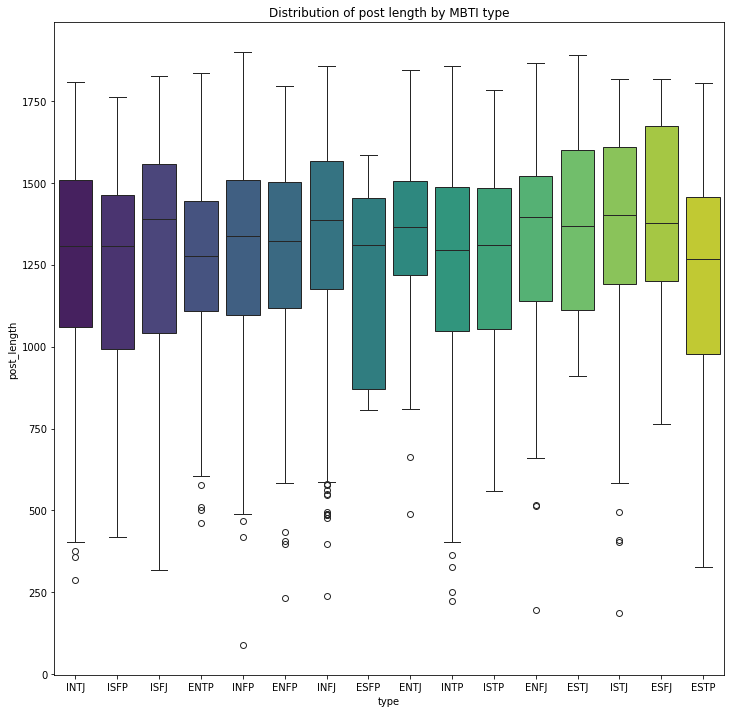

In [ ]:
#Visualize relationships between MBTI types and text features.
plt.figure(figsize=(12,12))
sns.boxplot(x='type', y='post_length', data=mbti_data, palette='viridis')
plt.title('Distribution of post length by MBTI type')
plt.show()  #The post length distribution is similar across all MBTI types.


### Data Preprocessing and modelling 




In [6]:
#check the mbti_data columns 
mbti_data.columns

Index(['type', 'posts', 'post_length'], dtype='object')

In [16]:
print(mbti_data['type'].value_counts())
print(balanced_data['type'].value_counts())

type
INFP    550
INFJ    441
INTP    391
INTJ    327
ENTP    205
ENFP    202
ISTP    101
ISFP     81
ENTJ     69
ISTJ     62
ENFJ     57
ISFJ     50
ESTP     27
ESFP     14
ESFJ     13
ESTJ     12
Name: count, dtype: int64
type
ENFJ    39
ENFP    39
ENTJ    39
ENTP    39
ESFJ    39
ESFP    39
ESTJ    39
ESTP    39
INFJ    39
INFP    39
INTJ    39
INTP    39
ISFJ    39
ISFP    39
ISTJ    39
ISTP    39
Name: count, dtype: int64


<ipython-input-15-fefddda5a302>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='post_length', data=balanced_data, palette='viridis')


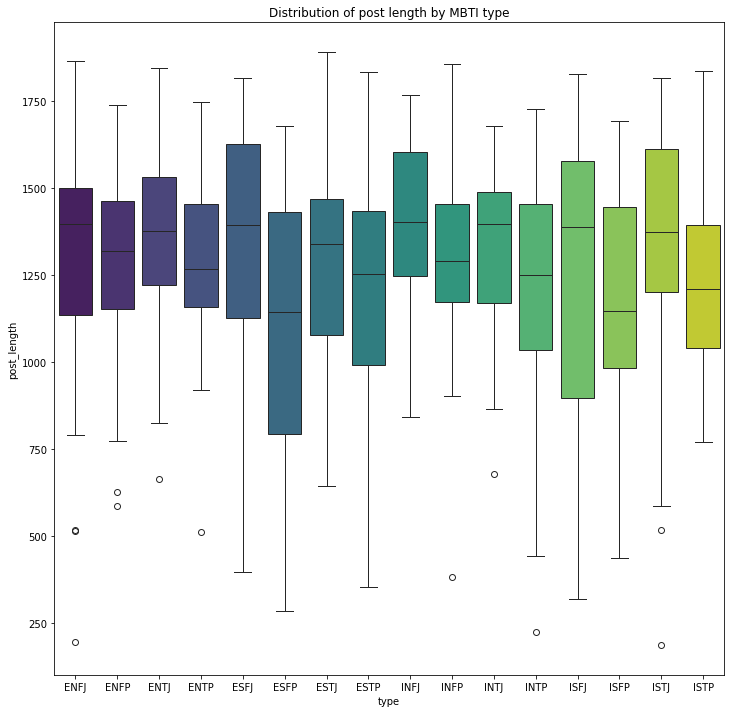

In [15]:
#Visualize relationships between MBTI types and text features.
plt.figure(figsize=(12,12))
sns.boxplot(x='type', y='post_length', data=balanced_data, palette='viridis')
plt.title('Distribution of post length by MBTI type')
plt.show()  #The post length distribution is similar across all MBTI types.